In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (25,35)
%matplotlib inline

### Basic damped oscillation

Solution to $Ax''+Bx'+Cx=sin(t)$

$x'' = \frac{sin(t)-Bx'-Cx}{A}$


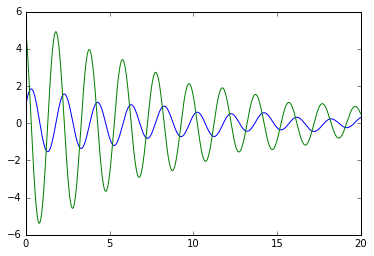

In [8]:
def dxdt(x, t, A, B, C): 
    velocity = x[1]
    acceleration = (np.sin(t)-B*x[1] - C*x[0])/A
    return [velocity, acceleration]

A = 1 #moment of inertia
B = 0.2 #damping coefficient
C = 10

initialConditions = [1,5] #[x0, v0]

time = np.arange(0,20,0.01)

solution = odeint(dxdt, initialConditions, time, args=(A,B,C))

plt.plot(time, solution[:,0])
plt.plot(time, solution[:,1])
plt.show()

## More complex example
### Includes linear and quadratic damping, torsion damping, and torque from magnetic dipole

$-K\theta - b_{drag} \dot{\theta} - c \dot{\theta}^2 - \frac{\sigma h \pi B^2}{8} \dot{\theta} sin^2(\theta) (b^4 - a^4) = I \ddot{\theta}$

$\ddot{\theta} = \frac{-K\theta - b_{drag} \dot{\theta} - c \dot{\theta}^2 - \frac{\sigma h \pi B^2}{8} \dot{\theta} sin^2(\theta) (b^4 - a^4)}{I}$

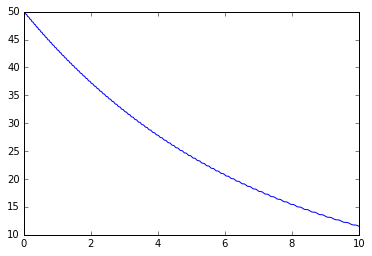

In [42]:
#input constants below
mass = 1 #kg
innerRadius = 1
outerRadius = 2
washerThickness = 0.25
torsionConstant = 0
momentOfInertia = mass*((innerRadius**2 + outerRadius**2)/4 +  washerThickness**2/12)
quadraticDrag = 0
linearDrag = 0
sigma = 1
rho = 1
magneticField = 0.5
epsilon = washerThickness**2/(3*innerRadius**2 + outerRadius**2)

initialConditions = [0,50] #x0, y0

time = np.arange(0,10,0.001)


def thetaPrime (x, t, torsionConstant, linearDrag, quadraticDrag, sigma, washerThickness,\
                magneticField, outerRadius, innerRadius, momentOfInertia):
    out1 = x[1]
    out2 = (-torsionConstant*x[0]-linearDrag*x[1]-np.sign(x[1])*quadraticDrag*x[1]**2 \
            -((outerRadius**4-innerRadius**4)*sigma*washerThickness*np.pi*magneticField**2*x[1]*(np.sin(x[0])**2/8))) \
            /momentOfInertia
    return [out1, out2]


# Solve the equation.
solve = odeint(thetaPrime, initialConditions, time, args=(torsionConstant, linearDrag, quadraticDrag,\
        sigma, washerThickness, magneticField, outerRadius, innerRadius, momentOfInertia))


plt.plot(time, solve[:,1])
plt.show()